| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | [lambdas](./07_lambdas.ipynb) |
| ----------------------------------- | -------------------------------------------- | ------------- | --------------------------------------- | --------------------------------- | --------------------------------- | --------------------------------------- | ------------------------------- | ----------------------------- |

# Working with Mineral Composition Data
##### *~8 min*

### Mineral Database
pyrolite includes a limited mineral database which is useful for looking up endmember compositions.

In [1]:
import pandas as pd
from pyrolite.mineral.mindb import (
    list_groups,
    list_minerals,
    list_formulae,
    get_mineral,
    get_mineral_group,
)

pd.set_option("precision", 3)  # smaller outputs

From the database, you can get the list of its contents using a few utility
functions:



In [2]:
list_groups()

['epidote',
 'olivine',
 'spinel',
 'mica',
 'pyroxene',
 'amphibole',
 'garnet',
 'feldspar']

In [3]:
', '.join(list_minerals()) # string the list of minerals together so we can print it succinctly

'ferroeckermanite, ferrosilite, hercynite, polylithionite, kaersutite, microcline, katophorite, uvarovite, manganiceladonite, andradite, magnesiochromite, almandine, hedenbergite, magnesioarfvedsonite, magnesioferrite, arvedsonite, piemontite, ferrorichterite, pyrope, hastingsite, ferroaluminoceladonite, tschermakite, tephroite, ferrokatophorite, ferropargasite, aegirine, magnetite, gedrite, anthopyllite, annite, eckermanite, spodumene, majorite, richterite, allanite, ferroedenite, phengite, trilithionite, barroisite, ferrokaersutite, chromphyllite, glaucophane, aluminoceladonite, siderophyllite, morimotoite, namansilite, anorthite, edenite, magnesiohastingsite, esseneite, muscovite, riebeckite, eastonite, kosmochlor, paragonite, epidote, grossular, magnesiohornblende, enstatite, liebenbergite, jadeite, forsterite, albite, ferrotschermakite, tremolite, chromoceladonite, margarite, diopside, winchite, spessartine, chromite, johannsenite, clintonite, clinozoisite, spinel, celadonite, phl

In [4]:
', '.join(list_formulae()) # string the list of minerals formulae so we can print it succinctly

'Ca2Al3(Si2O7)(SiO4)O(OH), CaFeSi2O6, LiAlSi2O6, (NaCa)(Mg4Al)(Si8)O22(OH)2, Fe{2+}Cr{3+}2O4, Mg3(MgSi)(SiO4)3, K2(Mg4)(Si4Al6)O20(OH)4, (Na2)(Mg3Al2)(Si8)O22(OH)2, Na(Ca2)(Fe4Ti)(Si6Al2)O22(OH)2, CaAl2Si2O8, Na(NaCa)(Mg5)(Si8)O22(OH)2, K2(Mg2Cr{3+}2)(Si8)O20(OH)4, Ca3(TiFe{2+})(SiO4)3, Mg3Al2(SiO4)3, K2(Fe{2+}4)(Si4Al6)O20(OH)4, NaMn{3+}Si2O6, KAlSi3O8, Na(Na2)(Mg4Fe{3+})(Si8)O22(OH)2, Na(Na2)(Fe{2+}4Fe{3+})(Si8)O22(OH)2, Ca3Fe{3+}2(SiO4)3, Mn2SiO4, Ca2Al2Mn{3+}(Si2O7)(SiO4)O(OH), NaAlSi3O8, Na(Ca2)(Mg4Fe{3+})(Si6Al2)O22(OH)2, K2(Mg6)(Si6Al2)O20(OH)4, (Ca2)(Fe4Al)(Si7Al)O22(OH)2, CaCe{3+}Al2Fe{2+}(Si2O7)(SiO4)O(OH), K2(Fe{2+}2Al2)(Si8)O20(OH)4, K2(Fe{3+}2Mg2)(Si8)O20(OH)4, Ca2Al2Fe{3+}(Si2O7)(SiO4)O(OH), K2(Al3Li3)(Si6Al2)O20(OH)4, Na(Ca2)(Fe5)(Si7Al)O22(OH)2, (NaCa)(Mg3Al2)(Si7Al)O22(OH)2, (Na2)(Mg3Fe{3+}2)(Si8)O22(OH)2, K2(Cr{3+}4)(Si6Al2)O20(OH)4, MgFe{3+}2O4, Fe{2+}Fe{3+}2O4, Na(Na2)(Fe4Al)(Si8)O22(OH)2, CaMgSi2O6, Mg2SiO4, Mg2Si2O6, MgAl2O4, Na(Ca2)(Mg5)(Si7Al)O22(OH)2, Fe2SiO4, 

You can also directly get the composition of specific minerals by name. These will be a `pd.Series` of elemental Wt% data (although derived from the formuale directly), and normalised to 100%:

In [5]:
get_mineral("forsterite")

name       forsterite
group         olivine
formula       Mg2SiO4
Mg              0.346
Si              0.200
O               0.455
Fe              0.000
Mn              0.000
Ni              0.000
Ca              0.000
Al              0.000
Fe{3+}          0.000
Na              0.000
Mn{3+}          0.000
Cr              0.000
Li              0.000
Cr{3+}          0.000
Fe{2+}          0.000
K               0.000
H               0.000
Ti              0.000
Ce{3+}          0.000
dtype: object

If you want to get compositions for all minerals within a specific group, you can
use `get_mineral_group`:



In [6]:
get_mineral_group("olivine")

,name,formula,Mg,Si,O,Fe,Mn,Ni
0,forsterite,Mg2SiO4,0.346,0.200,0.455,0.000,0.000,0.000
1,fayalite,Fe2SiO4,0.000,0.138,0.314,0.548,0.000,0.000
2,tephroite,Mn2SiO4,0.000,0.139,0.317,0.000,0.544,0.000
3,liebenbergite,Ni1.5Mg0.5SiO4,0.063,0.146,0.333,0.000,0.000,0.458


In some cases, these might give some useful reference points for comparing your mineral or whole-rock data to:

<AxesSubplot:xlabel='CaO', ylabel='MgO'>

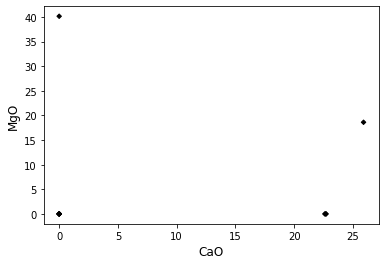

In [7]:
px_comps = get_mineral_group('pyroxene').pyrochem.convert_chemistry(to=["MgO", "SiO2", "CaO", "FeO", "MnO", "Al2O3", "Na2O"]).fillna(0) * 100 # pyroxene compositions as Wt% oxides
px_comps[['CaO', 'MgO']].pyroplot.scatter(c='k', s=10)

C:\Users\WIL9DH\AppData\Local\Continuum\anaconda3\envs\pyrolite\lib\site-packages\mpltern\ternary\transforms.py:207: RuntimeWarning: invalid value encountered in true_divide
  points /= np.sum(points, axis=1)[:, np.newaxis]


<TernaryAxesSubplot:>

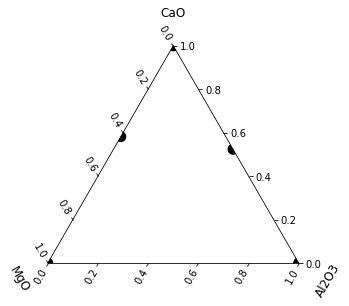

In [8]:
px_comps[['CaO', 'MgO', 'Al2O3']].pyroplot.scatter(c='k', marker='o', s=100, zorder=10)

### Mineral Endmember Decomposition

A common task when working with mineral chemistry data is to take measured compositions
and decompose these into relative proportions of mineral endmember compositions.
pyrolite includes some utilities to achieve this and a limited mineral database
for looking up endmember compositions.

In [9]:
import pandas as pd
import numpy as np
from pyrolite.mineral.mindb import get_mineral
from pyrolite.mineral.normative import endmember_decompose

First we'll start with a composition of an unknown olivine:




In [10]:
comp = pd.Series({"MgO": 42.06, "SiO2": 39.19, "FeO": 18.75})
df = pd.DataFrame([comp, comp]) # a dataframe with this composition twice, to illustrate what you might do with a table of olivine compositions

We can break this down into olivine endmebmers using the
`endmember_decompose` function:

In [11]:
ed = endmember_decompose(df, endmembers="olivine", ord=1, molecular=True)
ed

name,forsterite,fayalite
0,79.995,20.005
1,79.995,20.005


Equally, if you knew the likely endmembers beforehand, you could specify a list of
endmembers:




In [12]:
ed = endmember_decompose(
    df, endmembers=["forsterite", "fayalite"], ord=1, molecular=True
)
ed

,forsterite,fayalite
0,79.995,20.005
1,79.995,20.005


We can check this by recombining the components with these proportions. We can first
lookup the compositions for our endmembers:




In [13]:
em = pd.DataFrame([get_mineral("forsterite"), get_mineral("fayalite")])
em.loc[:, ~(em == 0).all(axis=0)]  # columns not full of zeros

,name,group,formula,Mg,Si,O,Fe
0,forsterite,olivine,Mg2SiO4,0.346,0.200,0.455,0.000
1,fayalite,olivine,Fe2SiO4,0.000,0.138,0.314,0.548


First we have to convert these element-based compositions to the oxide-based compositions we started with (or alternatively, we could go the other way around):

In [14]:
emvalues = (
    em.loc[:, ["Mg", "Si", "Fe"]]
    .pyrochem.to_molecular()
    .fillna(0)
    .pyrochem.convert_chemistry(to=["MgO", "SiO2", "FeO"], molecular=True)
    .fillna(0)
    .pyrocomp.renormalise(scale=1)
)
emvalues

,MgO,SiO2,FeO
0,0.667,0.333,0.000
1,0.000,0.333,0.667


These can now be used with our endmember proportions to regenerate a composition, noting that these are molecular - we'll need to convert them to Wt%:


In [15]:
recombined = pd.DataFrame(ed.values @ emvalues).pyrochem.to_weight()
recombined

,MgO,SiO2,FeO
0,42.06,39.191,18.75
1,42.06,39.191,18.75


To make sure these compositions are within 0.01 percent:




In [16]:
assert np.allclose(recombined.values, comp.values, rtol=10 ** -4)

----
<div class='alert alert-warning'> <b> <font size="+1">Checkpoint & Time Check</font></b><br>How are things going?</div>

----

| [**Overview**](./00_overview.ipynb) | [Getting Started](./01_jupyter_python.ipynb) | **Examples:** | [Access](./02_accessing_indexing.ipynb) | [Transform](./03_transform.ipynb) | [Plotting](./04_simple_vis.ipynb) | [Norm-Spiders](./05_norm_spiders.ipynb) | [Minerals](./06_minerals.ipynb) | [lambdas](./07_lambdas.ipynb) |
| ----------------------------------- | -------------------------------------------- | ------------- | --------------------------------------- | --------------------------------- | --------------------------------- | --------------------------------------- | ------------------------------- | ----------------------------- |